## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –ê–∫–º–æ–ª–∏–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [224]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.head(5)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [225]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola = df_akmola.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_akmola.head()

–ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01  4455.35     9.8        372560.0   -12.490323
1  2015-02  3654.20     9.8        399442.0   -10.192857
2  2015-03  4287.08     8.3        425605.0    -5.870968
3  2015-04  3923.21     8.8        440023.0     4.490000
4  2015-05  3849.70    42.8        444647.0    14.574194

In [226]:
df_akmola = df_akmola.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_akmola.head()

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  2015-01          4455.35     9.8        372560.0   -12.490323
1  2015-02          3654.20     9.8        399442.0   -10.192857
2  2015-03          4287.08     8.3        425605.0    -5.870968
3  2015-04          3923.21     8.8        440023.0     4.490000
4  2015-05          3849.70    42.8        444647.0    14.574194

In [227]:
df_akmola['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_akmola['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')

In [228]:
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥           120 non-null    datetime64[ns]
 1   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏           120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [229]:
df_akmola.isna().sum()

–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

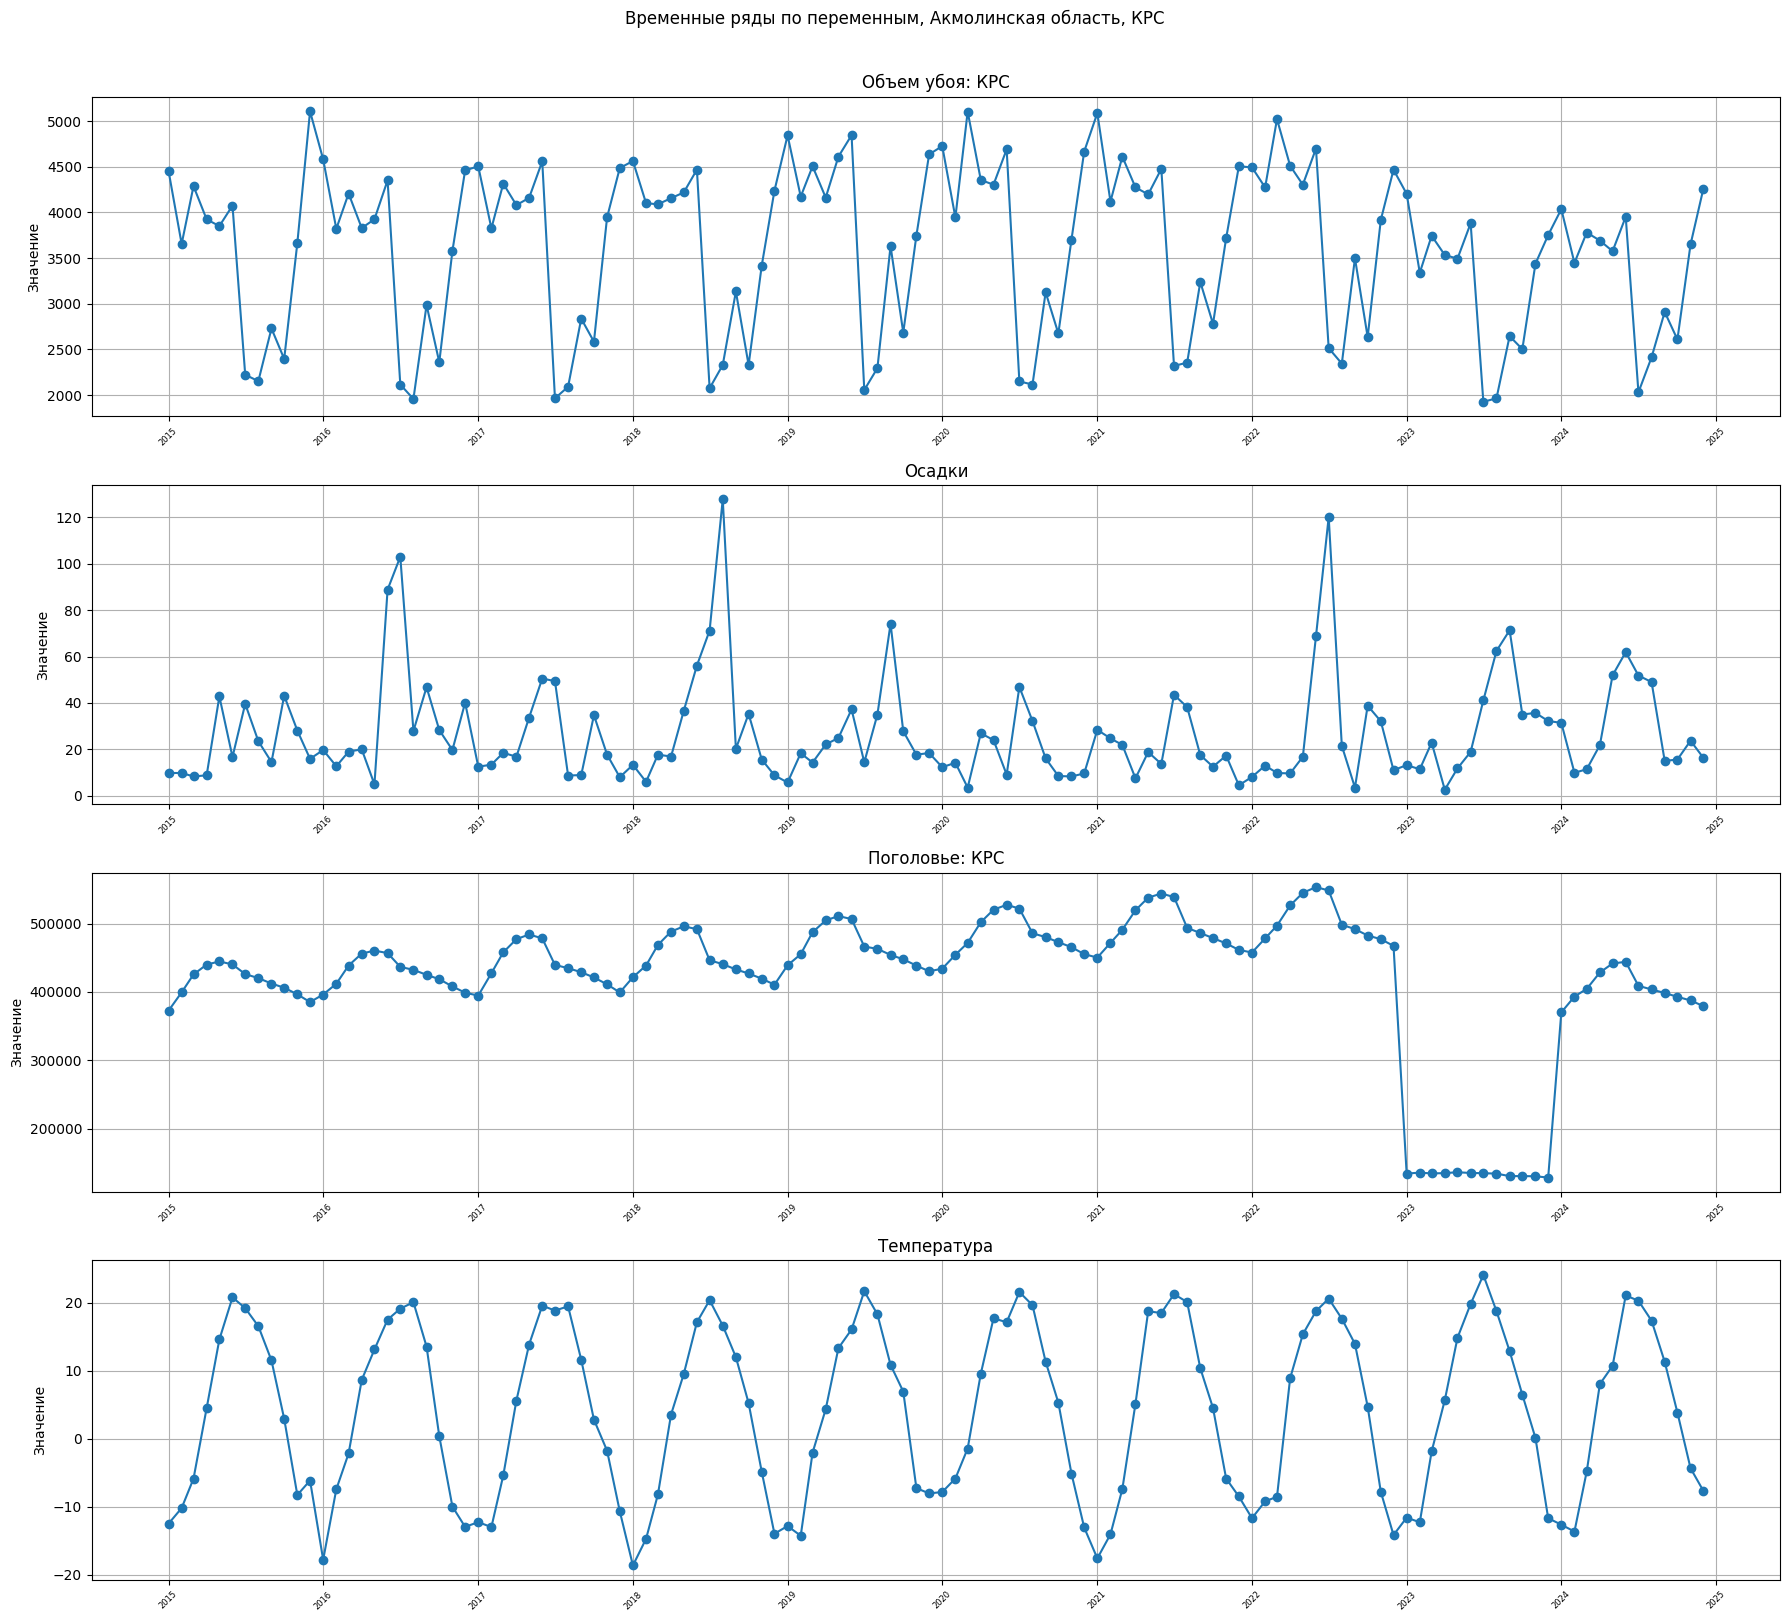

In [230]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()


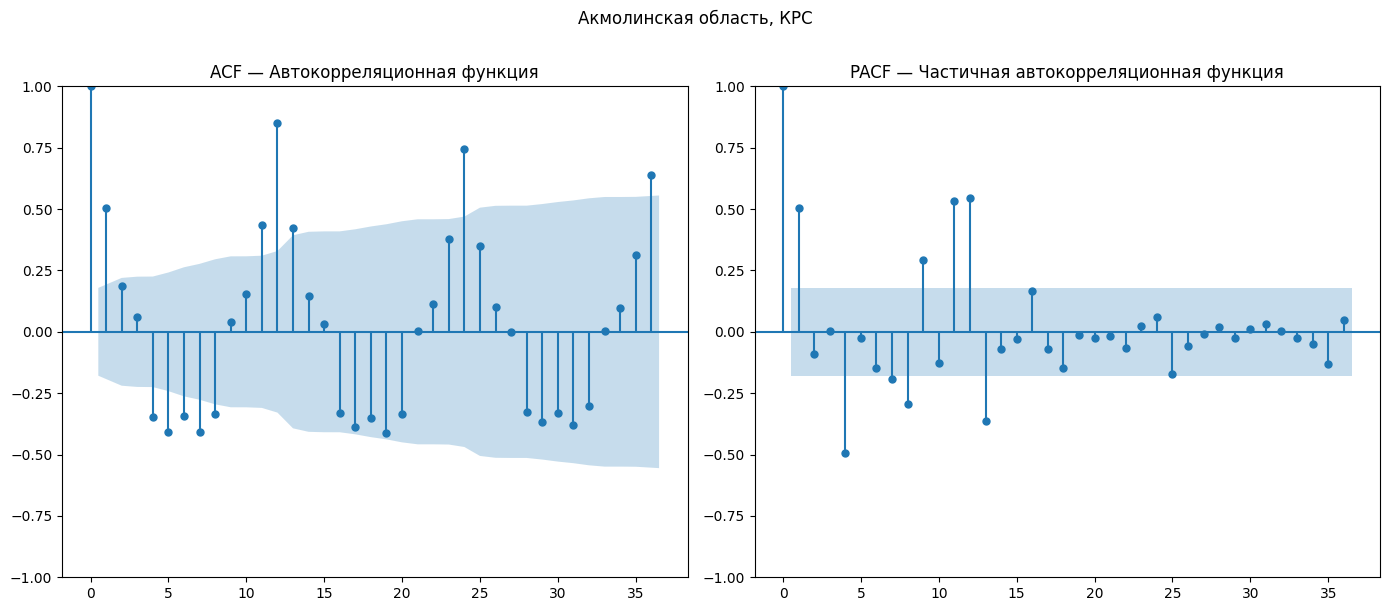

In [231]:
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=36, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=36, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24 –∏ +36 –º–µ—Å—è—Ü–µ–≤). 

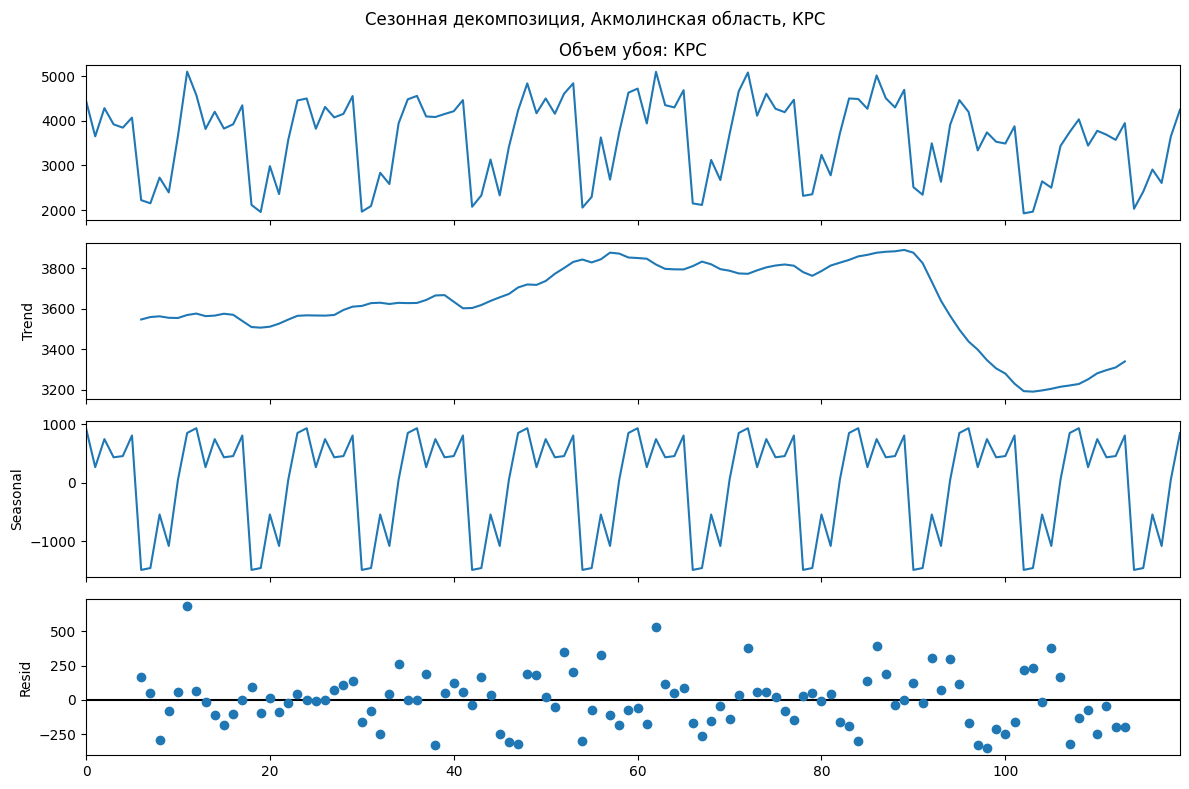

In [232]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [233]:
# Run ADF test
result = adfuller(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.2365
p-value: 0.6577
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [234]:
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0   2015-01-01          4455.35     9.8        372560.0   -12.490323
1   2015-02-01          3654.20     9.8        399442.0   -10.192857
2   2015-03-01          4287.08     8.3        425605.0    -5.870968
3   2015-04-01          3923.21     8.8        440023.0     4.490000
4   2015-05-01          3849.70    42.8        444647.0    14.574194
..         ...              ...     ...             ...          ...
115 2024-08-01          2412.70    49.0        403674.0    17.338710
116 2024-09-01          2909.66    15.0        398450.0    11.300000
117 2024-10-01          2608.27    15.6        392916.0     3.832258
118 2024-11-01          3649.19    23.7        387565.0    -4.343333
119 2024-12-01          4253.58    16.4        379385.0    -7.638710

[120 rows x 5 columns]

In [235]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-4 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 5):
    df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)
    df_akmola[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_akmola["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_akmola[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_akmola["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_akmola[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_akmola["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–¥–≤–∏–≥–æ–≤
df_akmola_lagged = df_akmola.dropna().copy()
df_akmola_lagged = df_akmola_lagged[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]

df_akmola_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
5   2015-06-01          4074.13  3849.70  3923.21  4287.08  3654.20   
6   2015-07-01          2221.96  4074.13  3849.70  3923.21  4287.08   
7   2015-08-01          2151.76  2221.96  4074.13  3849.70  3923.21   
8   2015-09-01          2728.61  2151.76  2221.96  4074.13  3849.70   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
4      14.574194         4.490000        -5.870968       -10.192857   
5      20.763333        14.574194         4.490000        -5.870968   
6      19.180645        20.763333        14.574194         4.490000   
7      16.529032        19.180645        20.763333        14.574194   
8      11.496667        16.529032        19.180645        20.763333   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
5         -10.192857    16.7        42.8         8.8         8.3         9.8   
6          -5.870968    39.6        16.7        42.8         8.8         8.3   
7           4.490000    23.5        39.6        16.7        42.8         8.8   
8          14.574194    14.5        23.5        39.6        16.7        42.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
4          444647.0            440023.0            425605.0   
5          440238.0            444647.0            440023.0   
6          426134.0            440238.0            444647.0   
7          420244.0            426134.0            440238.0   
8          412301.0            420244.0            426134.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
4              399442.0            372560.0  
5              425605.0            399442.0  
6              440023.0            425605.0  
7              444647.0            440023.0  
8              440238.0            444647.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

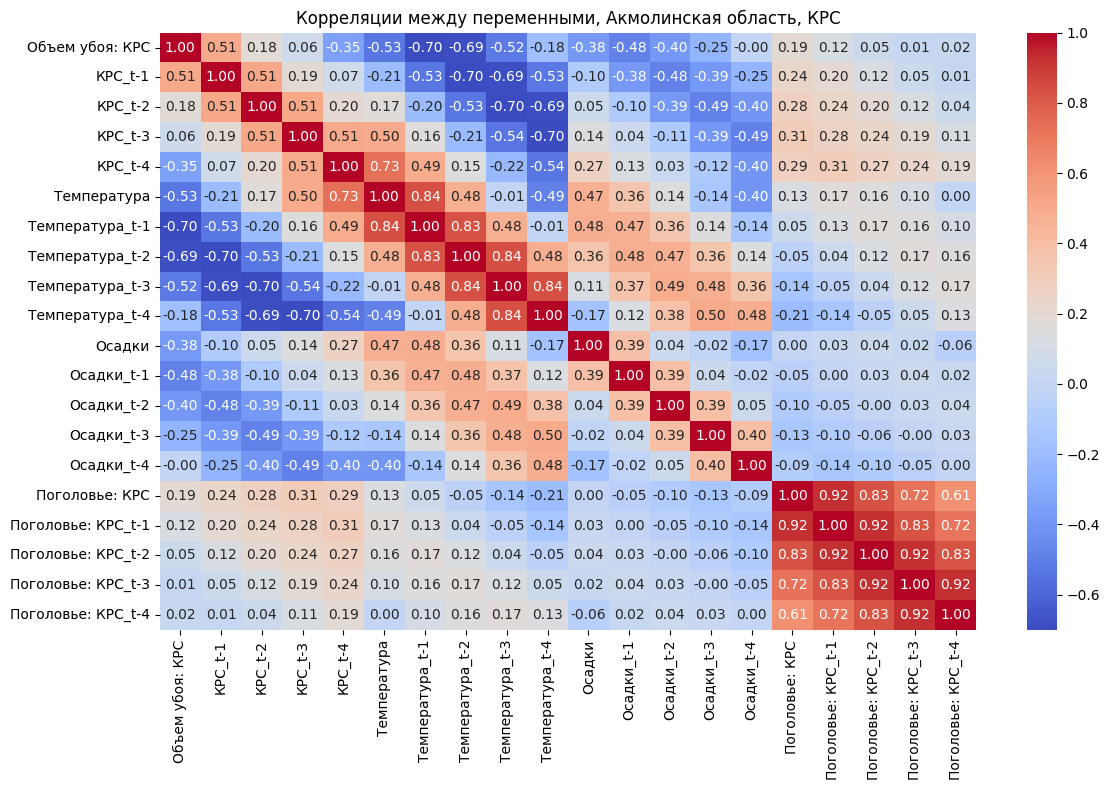

In [236]:
df_corr = df_akmola_lagged[[col for col in df_akmola_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°")
plt.tight_layout()
plt.show()

* –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.51) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t-1, t-1 –∏ t-2 —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ;
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –ª–∞–≥–∞ –≤ t-3. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏, –≤ —Ç–æ–º —á–∏—Å–ª–µ –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã, —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è; 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ–∫—É—â–µ–≥–æ –∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–µ–≤ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.19 –∏ 0.12).

**–ú–û–ñ–ù–û –ï–©–ï –î–û–ë–ê–í–ò–¢–¨ –í–´–í–û–î–´ –ü–†–ò –ù–ï–û–ë–•–û–î–ò–ú–û–°–¢–ò**

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [237]:
df_akmola = df_akmola[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]
df_akmola

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
0   2015-01-01          4455.35      NaN      NaN      NaN      NaN   
1   2015-02-01          3654.20  4455.35      NaN      NaN      NaN   
2   2015-03-01          4287.08  3654.20  4455.35      NaN      NaN   
3   2015-04-01          3923.21  4287.08  3654.20  4455.35      NaN   
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
0     -12.490323              NaN              NaN              NaN   
1     -10.192857       -12.490323              NaN              NaN   
2      -5.870968       -10.192857       -12.490323              NaN   
3       4.490000        -5.870968       -10.192857       -12.490323   
4      14.574194         4.490000        -5.870968       -10.192857   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
0                NaN     9.8         NaN         NaN         NaN         NaN   
1                NaN     9.8         9.8         NaN         NaN         NaN   
2                NaN     8.3         9.8         9.8         NaN         NaN   
3                NaN     8.8         8.3         9.8         9.8         NaN   
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
0          372560.0                 NaN                 NaN   
1          399442.0            372560.0                 NaN   
2          425605.0            399442.0            372560.0   
3          440023.0            425605.0            399442.0   
4          444647.0            440023.0            425605.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3              372560.0                 NaN  
4              399442.0            372560.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

In [238]:
df_akmola_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
4   2015-05-01          3849.70  3923.21  4287.08  3654.20  4455.35   
5   2015-06-01          4074.13  3849.70  3923.21  4287.08  3654.20   
6   2015-07-01          2221.96  4074.13  3849.70  3923.21  4287.08   
7   2015-08-01          2151.76  2221.96  4074.13  3849.70  3923.21   
8   2015-09-01          2728.61  2151.76  2221.96  4074.13  3849.70   
..         ...              ...      ...      ...      ...      ...   
115 2024-08-01          2412.70  2029.47  3951.41  3574.86  3691.05   
116 2024-09-01          2909.66  2412.70  2029.47  3951.41  3574.86   
117 2024-10-01          2608.27  2909.66  2412.70  2029.47  3951.41   
118 2024-11-01          3649.19  2608.27  2909.66  2412.70  2029.47   
119 2024-12-01          4253.58  3649.19  2608.27  2909.66  2412.70   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
4      14.574194         4.490000        -5.870968       -10.192857   
5      20.763333        14.574194         4.490000        -5.870968   
6      19.180645        20.763333        14.574194         4.490000   
7      16.529032        19.180645        20.763333        14.574194   
8      11.496667        16.529032        19.180645        20.763333   
..           ...              ...              ...              ...   
115    17.338710        20.270968        21.043333        10.696774   
116    11.300000        17.338710        20.270968        21.043333   
117     3.832258        11.300000        17.338710        20.270968   
118    -4.343333         3.832258        11.300000        17.338710   
119    -7.638710        -4.343333         3.832258        11.300000   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
4         -12.490323    42.8         8.8         8.3         9.8         9.8   
5         -10.192857    16.7        42.8         8.8         8.3         9.8   
6          -5.870968    39.6        16.7        42.8         8.8         8.3   
7           4.490000    23.5        39.6        16.7        42.8         8.8   
8          14.574194    14.5        23.5        39.6        16.7        42.8   
..               ...     ...         ...         ...         ...         ...   
115         8.026667    49.0        51.8        61.9        51.9        21.8   
116        10.696774    15.0        49.0        51.8        61.9        51.9   
117        21.043333    15.6        15.0        49.0        51.8        61.9   
118        20.270968    23.7        15.6        15.0        49.0        51.8   
119        17.338710    16.4        23.7        15.6        15.0        49.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
4          444647.0            440023.0            425605.0   
5          440238.0            444647.0            440023.0   
6          426134.0            440238.0            444647.0   
7          420244.0            426134.0            440238.0   
8          412301.0            420244.0            426134.0   
..              ...                 ...                 ...   
115        403674.0            408936.0            444063.0   
116        398450.0            403674.0            408936.0   
117        392916.0            398450.0            403674.0   
118        387565.0            392916.0            398450.0   
119        379385.0            387565.0            392916.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
4              399442.0            372560.0  
5              425605.0            399442.0  
6              440023.0            425605.0  
7              444647.0            440023.0  
8              440238.0            444647.0  
..                  ...                 ...  
115            441647.0            428509.0  
116            444063.0            441647

In [239]:
df_vif = df_akmola_lagged[[col for col in df_akmola_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]]

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable         VIF
0                const  196.640560
1              –ö–†–°_t-1    3.000134
2              –ö–†–°_t-2    2.792945
3              –ö–†–°_t-3    2.834054
4              –ö–†–°_t-4    3.313961
5          –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   22.493800
6      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1   20.820626
7      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2   23.347806
8      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3   21.580502
9      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4   20.051279
10              –û—Å–∞–¥–∫–∏    1.635704
11          –û—Å–∞–¥–∫–∏_t-1    1.698896
12          –û—Å–∞–¥–∫–∏_t-2    1.738220
13          –û—Å–∞–¥–∫–∏_t-3    1.706987
14          –û—Å–∞–¥–∫–∏_t-4    1.751920
15      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°    8.229444
16  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1   16.060417
17  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2   15.783149
18  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3   15.291030
19  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4    8.296100

In [240]:
def forward_selection(data, target, candidate_features, criterion="adj_r2"):
    remaining = list(candidate_features)
    selected = []
    best_score = -float("inf")
    best_model = None

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            features = selected + [candidate]
            X = sm.add_constant(data[features])
            y = data[target]
            model = sm.OLS(y, X).fit()

            if criterion == "adj_r2":
                score = model.rsquared_adj
            elif criterion == "aic":
                score = -model.aic  # negative for maximizing
            else:
                raise ValueError("criterion must be 'adj_r2' or 'aic'")

            scores_with_candidates.append((score, candidate, model))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate, model = scores_with_candidates[0]

        if best_new_score > best_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            best_score = best_new_score
            best_model = model
            print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
        else:
            print("‚õî No improvement. Stopping.")
            break

    return selected, best_model


In [241]:
# Define target and candidate predictors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
candidate_features = ['–û—Å–∞–¥–∫–∏', '–û—Å–∞–¥–∫–∏_t-3', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-1',
    '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1',
    '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1',
    '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2', '–ö–†–°_t-1']

# Drop rows with missing values
df_mlr = df_akmola[candidate_features + [target]].dropna()

# Run forward selection
selected_features, final_model = forward_selection(df_mlr, target, candidate_features, criterion="adj_r2")

# Show final summary

print(selected_features)
# print("\nüßæ Final Model Summary:")
# print(final_model.summary())



‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1, ADJ_R2: 0.4866
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°, ADJ_R2: 0.5341
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3, ADJ_R2: 0.5612
‚úÖ Added: –ö–†–°_t-4, ADJ_R2: 0.6076
‚úÖ Added: –ö–†–°_t-2, ADJ_R2: 0.6682
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-1, ADJ_R2: 0.6729
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-3, ADJ_R2: 0.6772
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1, ADJ_R2: 0.6804
‚õî No improvement. Stopping.
['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1']


108    4035.37
109    3446.55
110    3779.21
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 108    3346.677706
109    4379.814545
110    4675.274719
dtype: float64 
 108    688.692294
109   -933.264545
110   -896.064719
dtype: float64


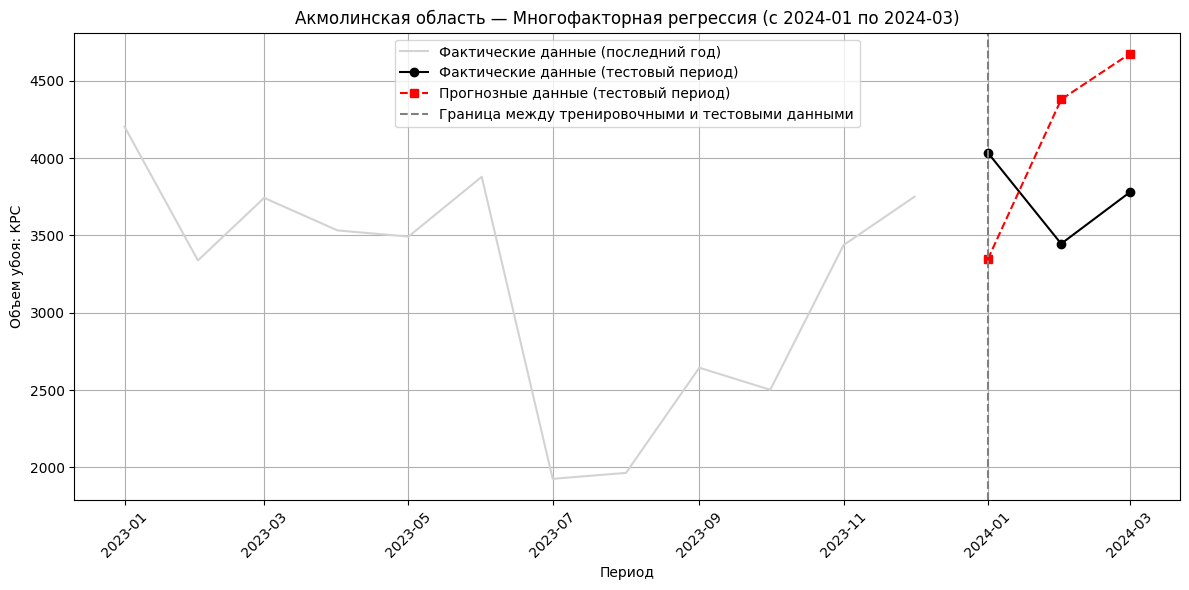

111    3691.05
112    3574.86
113    3951.41
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 111    4726.028540
112    4438.389236
113    4129.636930
dtype: float64 
 111   -1034.978540
112    -863.529236
113    -178.226930
dtype: float64


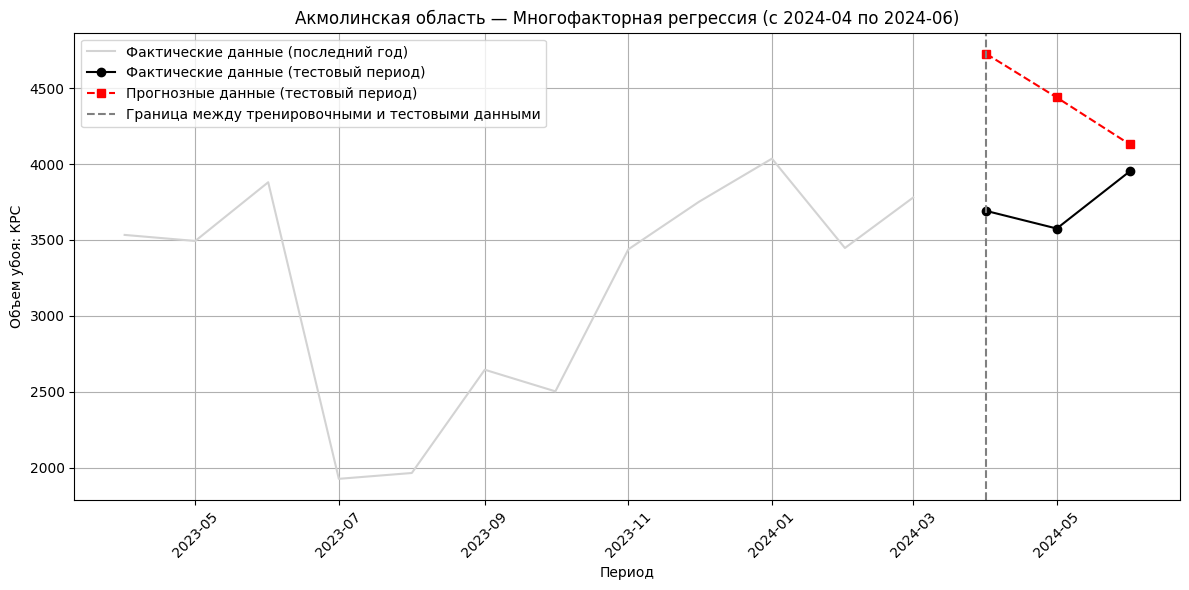

114    2029.47
115    2412.70
116    2909.66
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 114    3039.890500
115    2665.963746
116    2970.853998
dtype: float64 
 114   -1010.420500
115    -253.263746
116     -61.193998
dtype: float64


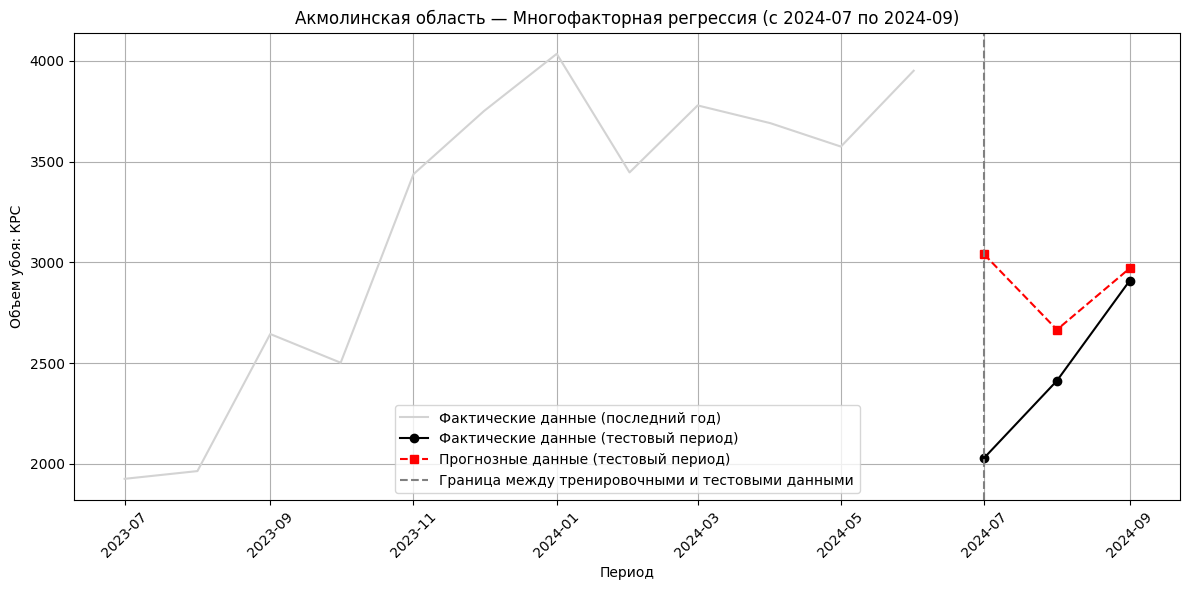

117    2608.27
118    3649.19
119    4253.58
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 117    2957.430931
118    3792.630594
119    4260.331803
dtype: float64 
 117   -349.160931
118   -143.440594
119     -6.751803
dtype: float64


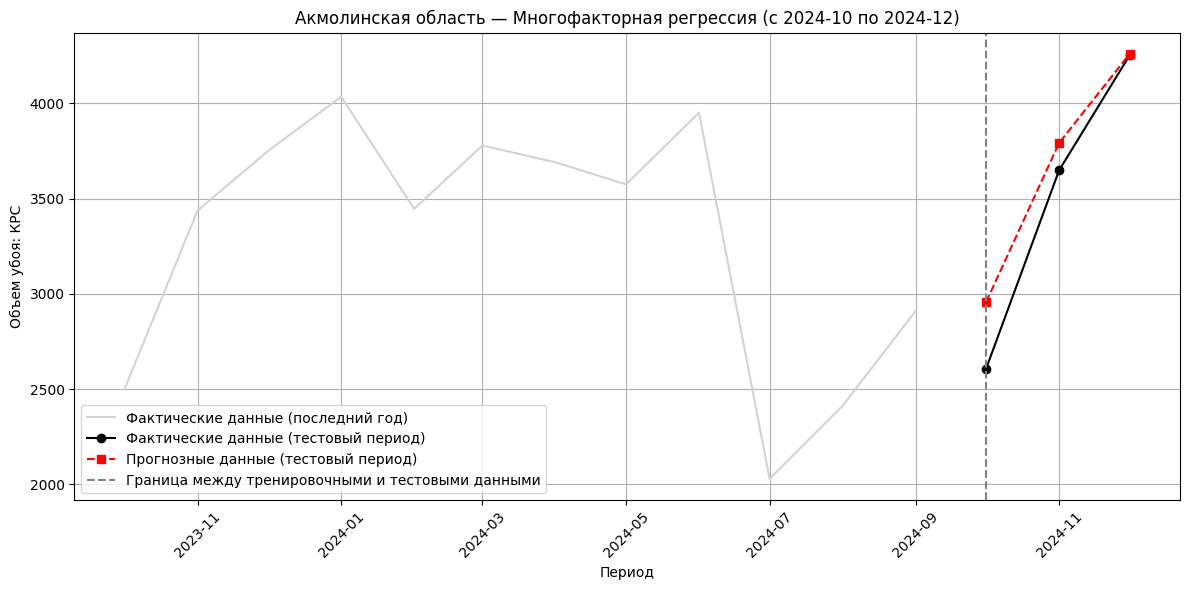

In [263]:
# Ensure your dataframe is sorted by time
df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()

# # Selected features
# selected_features = [
#     '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1'
# ]

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    # Drop NAs and align predictors
    X_train = sm.add_constant(train_df[selected_features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[selected_features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    print(y_test, '\n', y_pred, '\n', y_test-y_pred)

    r2 = r2_score(y_test, y_pred)
    # print("Zero values in y_test:", (y_test == 0).sum())


    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [243]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period        RMSE         MAE   MAPE (%)
0  2024-01 to 2024-03  846.209542  839.340520  22.618331
1  2024-04 to 2024-06  784.990055  692.244902  18.902098
2  2024-07 to 2024-09  602.449671  441.626082  20.795883
3  2024-10 to 2024-12  217.971058  166.451109   5.825390
4             Average  612.905082  534.915653  17.035426


#### ARIMA/SARIMA/SARIMAX

0    4035.37
1    3446.55
2    3779.21
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 0    3964.460897
1    3328.185167
2    3711.451204
dtype: float64 
 0     70.909103
1    118.364833
2     67.758796
dtype: float64
Are indices equal? True


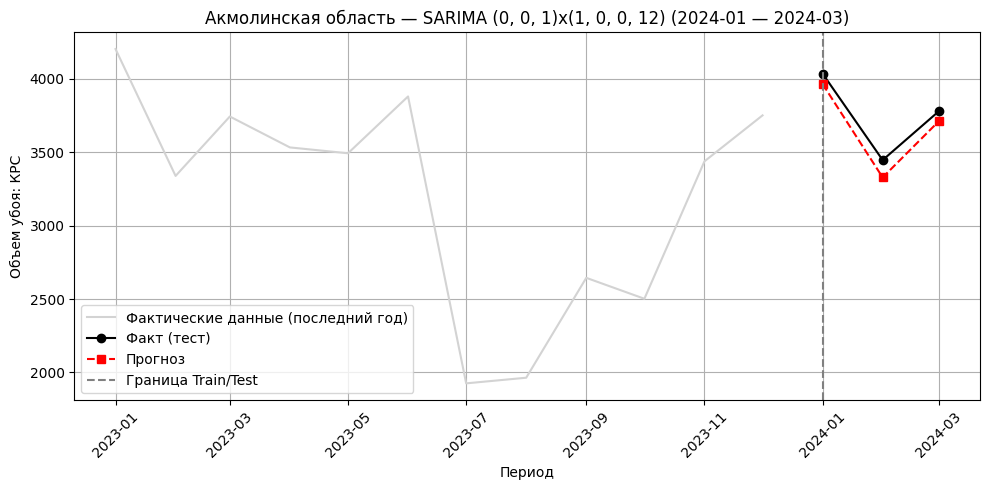

Zero values in y_test: 0
0    3691.05
1    3574.86
2    3951.41
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 0    3567.002926
1    3519.888982
2    3849.992381
dtype: float64 
 0    124.047074
1     54.971018
2    101.417619
dtype: float64
Are indices equal? True


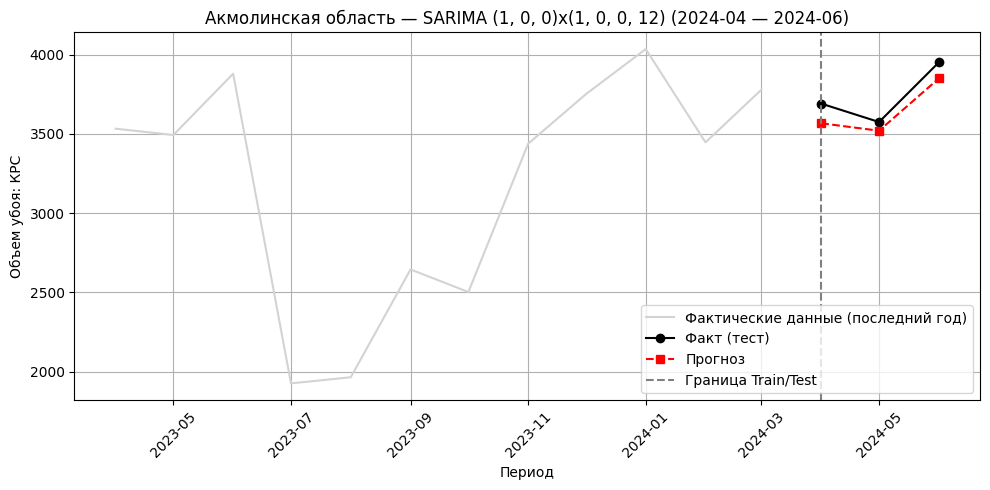

Zero values in y_test: 0
0    2029.47
1    2412.70
2    2909.66
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 0    1777.234411
1    1786.942469
2    2699.088228
dtype: float64 
 0    252.235589
1    625.757531
2    210.571772
dtype: float64
Are indices equal? True


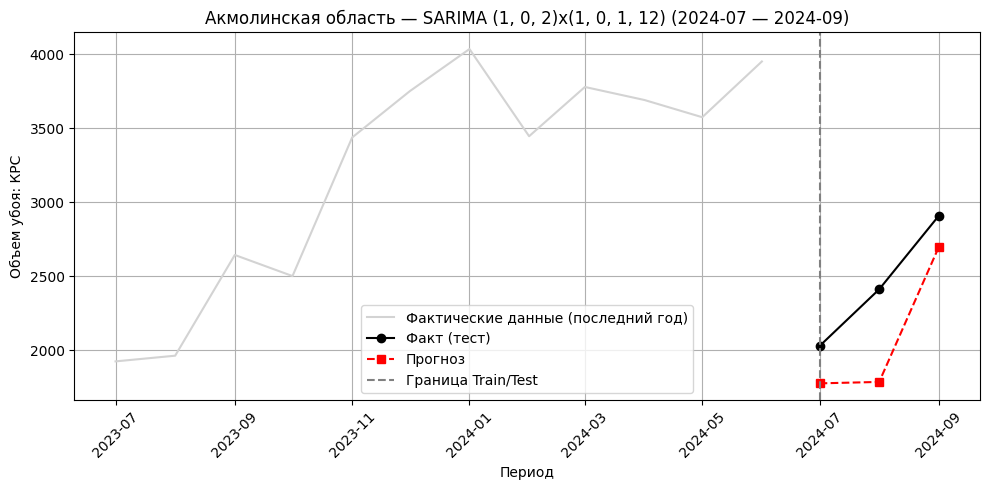

Zero values in y_test: 0
0    2608.27
1    3649.19
2    4253.58
Name: –û–±—ä–µ–º —É–±–æ—è: –ö–†–°, dtype: float64 
 0    2539.598221
1    3604.411741
2    3702.276228
dtype: float64 
 0     68.671779
1     44.778259
2    551.303772
dtype: float64
Are indices equal? True


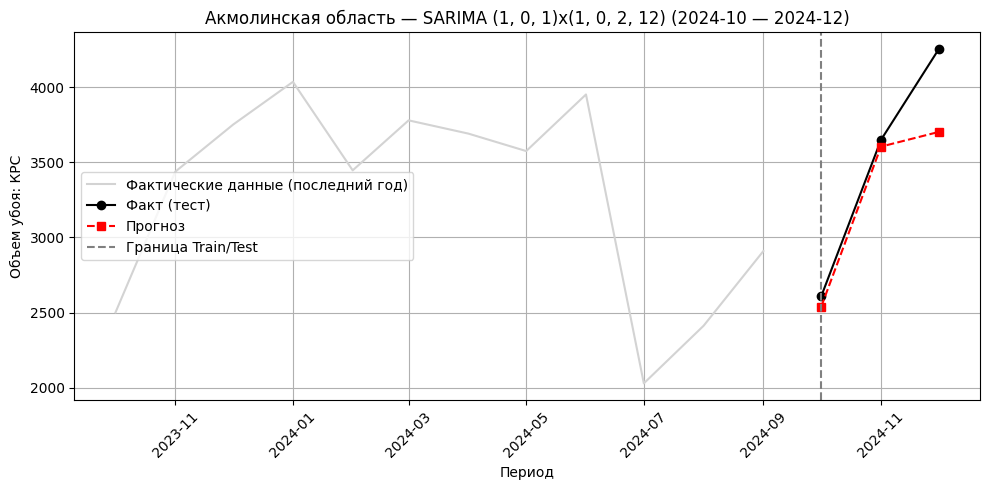

Zero values in y_test: 0


In [ ]:
df = df_akmola.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)
        # forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        # print(y_test, '\n', forecast, '\n', y_test-forecast)
        # print("Are indices equal?", y_test.index.equals(forecast.index))



        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ Train/Test")
        plt.title(f"–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å ‚Äî SARIMA {model.order}x{model.seasonal_order} ({start} ‚Äî {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [266]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period        RMSE         MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03   88.749815   85.677578   2.328141    (0, 0, 1)   
1  2024-04 to 2024-06   97.800857   93.478571   2.488361    (1, 0, 0)   
2  2024-07 to 2024-09  408.058718  362.854964  15.200539    (1, 0, 2)   
3  2024-10 to 2024-12  321.795357  221.584603   5.606952    (1, 0, 1)   
4             Average  229.101187  190.898929   6.405999          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 0, 12)  
2  (1, 0, 1, 12)  
3  (1, 0, 2, 12)  
4            NaN  


In [ ]:
# df_akmola = df_akmola[['–ü–µ—Ä–∏–æ–¥', '–û—Å–∞–¥–∫–∏', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°', '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']]
# df_akmola

In [ ]:
# # 1. Prepare the data
# target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
# features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']
# df_mlr = df_akmola[features + [target]].dropna()
# X = df_mlr[features]
# y = df_mlr[target]

# # 2. Add constant term for intercept
# X_const = sm.add_constant(X)

# # 3. Fit OLS model
# model = sm.OLS(y, X_const).fit()

# # 4. Summary with p-values
# print(model.summary())


In [ ]:
# # 1. Prepare the data
# target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
# features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']
# df_mlr = df_akmola[features + [target]].dropna()
# X = df_mlr[features]
# y = df_mlr[target]

# # 2. Add constant term for intercept
# X_const = sm.add_constant(X)

# # 3. Fit OLS model
# model = sm.OLS(y, X_const).fit()

# # 4. Summary with p-values
# print(model.summary())


In [ ]:
# 1. Define predictors and target
features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]  # <- adjust based on selected regressors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"

# 2. Drop NA (ensure clean data)
df_mlr = df_akmola[features + [target]].dropna().copy()

# 3. Train-test split: last 3 months = test
train_df = df_mlr.iloc[:-3]
test_df = df_mlr.iloc[-3:]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# 4. Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100

print("üìä Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# 7. Plot forecast vs actual
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test.values, marker='o', label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)", color='black')
plt.plot(y_test.index, y_pred, marker='s', linestyle='--', label="–ü—Ä–æ–≥–Ω–æ–∑", color='red')
plt.title("MLR ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –Ω–∞ 3 –º–µ—Å—è—Ü–∞ (–êkmola)")
plt.xlabel("–ú–µ—Å—è—Ü")
plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_akmola_lag = df_akmola.dropna().copy()
df_akmola_lag

In [ ]:
X_vif = add_constant(df_akmola_lag[[i for i in df_akmola_lag.columns if i not in ["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ü–µ—Ä–∏–æ–¥"]]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

### Multivariate Regression

#### check statistical significance

In [ ]:
# df_akmola = df_akmola.dropna().copy()
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]
X = df_akmola[['–û—Å–∞–¥–∫–∏', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
# print(f"\nüìç –†–µ–≥–∏–æ–Ω: {df_akmola.loc[0]['–†–µ–≥–∏–æ–Ω']}")
print(model.summary())

#     # ‚úÖ Collect results
#     for var in model.params.index:
#         results_list.append({
#             "–†–µ–≥–∏–æ–Ω": region,
#             "–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è": var,
#             "–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç": model.params[var],
#             "p-value": model.pvalues[var],
#             "R-–∫–≤–∞–¥—Ä–∞—Ç": model.rsquared
#         })

# # Convert to DataFrame
# results_df = pd.DataFrame(results_list)

# # Export to Excel
# # results_df.to_excel("krs_linear_regression_results.xlsx", index=False)

# print("\n –ì–æ—Ç–æ–≤–æ! –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –≤ 'krs_linear_regression_results.xlsx'")


#### forecast using MLR

In [ ]:
# Forecasting horizon
forecast_horizon = 3

# Container for summary results
results = []

# Loop through each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
        continue  # ‚õî skip this region
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

    if df_r.shape[0] < forecast_horizon + 12:
        continue  # skip if not enough data

    # Train-test split
    df_train = df_r.iloc[:-forecast_horizon]
    df_test = df_r.iloc[-forecast_horizon:]

    X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_train = df_train["–ö–†–°"]
    X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_test = df_test["–ö–†–°"]

    # Fit model
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100

    results.append({
        "–†–µ–≥–∏–æ–Ω": region,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R¬≤ (Train)": model.score(X_train, y_train)
    })

# Save results
results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region.xlsx", index=False)

results_df


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

#### regression for Kazakhstan - –ü–æ–≥–æ–ª–æ–≤—å–µ not statistically significant

In [ ]:
df_kazakhstan = df_model[df_model['–†–µ–≥–∏–æ–Ω'] == '–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù'][["–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]].dropna()
y = df_kazakhstan["–ö–†–°"]
X = df_kazakhstan[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
print("–†–µ–≥–∏–æ–Ω: –†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù")
print(model.summary())

In [ ]:
# from sklearn.linear_model import Ridge

# # Forecasting horizon
# forecast_horizon = 3

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = Ridge(alpha=1.0).fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # Plot actual vs forecast
#     plt.figure(figsize=(6, 3))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("ridge_forecast_evaluation_by_region.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# # Forecasting horizon
# forecast_horizon = 12

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = LinearRegression().fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # üü¶ Optional: Plot actual vs forecast
#     plt.figure(figsize=(8, 4))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region_12m.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# def sliding_window_evaluation(df_r, forecast_horizon=3, window_count=9):
#     metrics = []

#     # Ensure sorted by time
#     df_r = df_r.sort_values("–ü–µ—Ä–∏–æ–¥").reset_index(drop=True)

#     for i in range(window_count):
#         # Define train and test split
#         train_end = i + 12  # require 12+ months for training
#         test_start = train_end
#         test_end = test_start + forecast_horizon

#         if test_end > len(df_r):
#             break

#         df_train = df_r.iloc[:train_end]
#         df_test = df_r.iloc[test_start:test_end]

#         X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_train = df_train["–ö–†–°"]
#         X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_test = df_test["–ö–†–°"]

#         # Fit model
#         model = LinearRegression().fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         mae = mean_absolute_error(y_test, y_pred)
#         mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100

#         metrics.append({"RMSE": rmse, "MAE": mae, "MAPE": mape})

#     # Aggregate metrics over all sliding windows
#     return pd.DataFrame(metrics).mean().to_dict()

# results = []

# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # Optional: exclude a region

#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region][["–ü–µ—Ä–∏–æ–¥", "–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]].dropna()

#     if df_r.shape[0] < 24:
#         continue  # need enough data for multiple windows

#     metrics = sliding_window_evaluation(df_r)

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "Avg RMSE": metrics["RMSE"],
#         "Avg MAE": metrics["MAE"],
#         "Avg MAPE (%)": metrics["MAPE"]
#     })

# # Save result
# results_df = pd.DataFrame(results)
# results_df.to_excel("sliding_window_forecast_evaluation.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Å–∫–æ–ª—å–∑—è—â–∏–º –æ–∫–Ω–∞–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.")



### Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
# Container for forecast evaluation results
results = []

# Loop over each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
    y = df_r["–ö–†–°"].reset_index(drop=True)

    if y.isna().sum() > 0 or len(y) < 24:  # Need at least 2 full seasons
        continue

    # Split data
    test_size = 3
    y_train = y[:-test_size]
    y_test = y[-test_size:]

    try:
        # Auto SARIMA model selection
        model = auto_arima(
            y_train,
            seasonal=True,        # Enable SARIMA
            m=12,                 # Season length (12 months)
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        # Forecast
        forecast = model.predict(n_periods=test_size)

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "–†–µ–≥–∏–æ–Ω": region,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape
        })

        # Plot actual vs forecast
        plt.figure(figsize=(8, 4))
        plt.plot(y.index, y, color="lightgray", label="–í—Å–µ –¥–∞–Ω–Ω—ã–µ")
        plt.plot(y_test.index, y_test, marker="o", color="black", label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)")
        plt.plot(y_test.index, forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑")
        plt.axvline(len(y_train) - 1, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ Train/Test")
        plt.title(f"{region} ‚Äî SARIMA{model.order}x{model.seasonal_order} –ü—Ä–æ–≥–Ω–æ–∑ –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ {region}: {e}")

# Save results to Excel
results_df = pd.DataFrame(results)
results_df
# results_df.to_excel("sarima_forecast_evaluation_all_regions.xlsx", index=False)


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

In [ ]:
# Step 1: Select one region's time series
region = "–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨"
df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
y = df_r["–ö–†–°"].reset_index(drop=True)

# Step 2: Check stationarity (ADF test)
result = adfuller(y)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("‚ùå Non-stationary ‚Äî differencing needed.")
else:
    print("‚úÖ Stationary")



In [ ]:
# Step 3: (If needed) difference the series
y_diff = y.diff().dropna()

In [ ]:
# Step 4: Fit ARIMA model (p,d,q) ‚Äî try (1,1,1) to start
model = ARIMA(y, order=(1,1,1))  # (p=1, d=1, q=1) ‚Äî adjust based on AIC later
model_fit = model.fit()

# Step 5: Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("üîÆ Forecast for next 3 months:")
print(forecast)

# Step 6: Plot
plt.figure(figsize=(10,5))
plt.plot(y, label="Actual")
plt.plot(np.arange(len(y), len(y)+3), forecast, label="Forecast", marker='o')
plt.title(f"ARIMA Forecast ‚Äî {region}")
plt.legend()
plt.grid(True)
plt.show()

strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation